# Clusturing Images from Test Dataset of `Dataset0`
#### Goal : To get 4 cluster of image, so that it can be used as 4 classes of Road (based on the damage/condition of the road)

In [1]:
import warnings

## 1. Defining Functions

In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

import pandas as pd
import warnings
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress all warnings
warnings.filterwarnings("ignore")

def clustering_code(df, ppp, n_clusters=4, distance_metric='euclidean', method='agglomerative', eps=0.5, min_samples=5):
    pca_count = ppp  
    
    features = df.columns[1:]  # Exclude 'image_path' column
    X = df[features]

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=pca_count)
    X_pca = pca.fit_transform(X_scaled)

    # Apply Clustering based on the selected method
    if method == 'agglomerative':
        if distance_metric == 'euclidean':
            clustering = AgglomerativeClustering(n_clusters=n_clusters, metric=distance_metric, linkage='ward')
        else:
            clustering = AgglomerativeClustering(n_clusters=n_clusters, metric=distance_metric, linkage='average')
    elif method == 'dbscan':
        clustering = DBSCAN(metric=distance_metric, eps=eps, min_samples=min_samples)
    elif method == 'kmeans':
        clustering = KMeans(n_clusters=n_clusters, random_state=0, init='k-means++')
    else:
        raise ValueError("Unsupported method. Choose 'agglomerative', 'dbscan', or 'kmeans'.")

    clusters = clustering.fit_predict(X_pca)

    # Add PCA components and clusters to the DataFrame
    df_pca = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(pca_count)])
    df_pca['Cluster'] = clusters
    df_pca['image_path'] = df['image_path']

    # Merge with the original DataFrame
    df['Cluster'] = clusters

    # Create a figure with 1 row and 2 columns for subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    # PCA scatter plot
    palette = sns.color_palette("viridis", n_colors=len(df_pca['Cluster'].unique()))
    sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette=palette, s=100, alpha=0.7, ax=ax[0])

    # Plot settings for PCA
    ax[0].set_title(f'PCA of Clustering Results ({method} with {distance_metric} distance)')
    ax[0].set_xlabel('PCA Component 1')
    ax[0].set_ylabel('PCA Component 2')
    ax[0].legend(title='Cluster')

    # Calculate cluster counts
    cluster_counts = df['Cluster'].value_counts().sort_index()

    # Bar plot of cluster counts
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis", ax=ax[1])
    ax[1].set_title('Cluster Counts')
    ax[1].set_xlabel('Cluster')
    ax[1].set_ylabel('Number of Data Points')

    # Annotate the bar plot with count numbers
    for i in range(len(cluster_counts)):
        ax[1].text(x=i, y=cluster_counts.values[i] + 0.5, s=str(cluster_counts.values[i]), ha='center')

    plt.show()

    return df['image_path'], df['Cluster'], df['Cluster'].value_counts(normalize=True).sort_index()



# Example usage
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, n_clusters=3, distance_metric='euclidean', method='agglomerative')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, n_clusters=4, distance_metric='cosine', method='agglomerative')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=3, n_clusters=5, distance_metric='manhattan', method='agglomerative')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, distance_metric='cosine', method='dbscan')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, distance_metric='manhattan', method='dbscan')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, n_clusters=4, method='kmeans')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, n_clusters=6, method='kmeans')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, n_clusters=3, distance_metric='chebyshev', method='agglomerative')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, distance_metric='euclidean', method='dbscan')
# image_paths, clusters = clustering_code(df=df_one_hotencoding, ppp=2, n_clusters=4, distance_metric='minkowski', method='agglomerative')




In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

def display_sample_images(image_paths, clusters, n_samples=20, n_rows=3, n_cols=7):
    unique_clusters = set(clusters)
    
    for cluster_id in unique_clusters:
        cluster_images = [image_paths[i] for i in range(len(image_paths)) if clusters[i] == cluster_id]
        sample_images = cluster_images[:min(n_samples, len(cluster_images))]
        print(f"Cluster {cluster_id}: {len(sample_images)} samples")
        
        total_images = len(sample_images)
        images_per_page = n_rows * n_cols
        num_pages = (total_images + images_per_page - 1) // images_per_page
        
        for page in range(num_pages):
            start_idx = page * images_per_page
            end_idx = min(start_idx + images_per_page, total_images)
            
            # Dynamically calculate the figure size
            fig_width = n_cols * 2  # Width per image
            fig_height = n_rows * 2  # Height per image
            
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
            fig.suptitle(f'Cluster {cluster_id}', fontsize=16)
            axes = axes.flatten()
            
            for i, (img_path, ax) in enumerate(zip(sample_images[start_idx:end_idx], axes)):
                img = mpimg.imread(img_path)
                ax.imshow(img)
                ax.set_title(f"Cluster {cluster_id}", fontsize=10)
                ax.axis('off')

            # Hide any remaining subplots if the sample size is less than the grid size
            for j in range(i + 1, len(axes)):
                axes[j].axis('off')
            
            # Adjust spacing to minimize unwanted space
            plt.subplots_adjust(wspace=0.1, hspace=0.1, top=0.9) 
            plt.show()


# Example usage:
# display_sample_images(df['image_path'], df['Cluster'], n_samples=200, n_rows=4, n_cols=5)

In [4]:
warnings.filterwarnings("ignore")

def plot_histogram(df):
    features = df.columns[1:]  # Exclude 'image_path' column
    n_features = len(features)
    print("Number of Features: ", n_features)

    # Plot histograms for binary features
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot((len(features) // 3) + 1, 3, i + 1)
        sns.histplot(data=df, x=feature, discrete=True, kde=False)
        plt.title(f"Histogram of {feature}")

    plt.tight_layout()
    plt.show()


# Example usage:
# plot_histogram(df=df_data)

## 2. Analyzing Data

### 2.1 Analyzing `df_test_data_onehotencoding.csv` File content

This section of the code is responsible for loading and analyzing a dataset stored in a CSV file. The dataset is one-hot encoded, meaning that it consists of binary values (0s and 1s) indicating the presence or absence of specific conditions across various categories related to road surface conditions.

🔗 [CSV file](Dataset\Dataset0\df_test_data_onehotencoding.csv)

In [5]:
# Load the data
df_one_hotencoding = pd.read_csv('Dataset\Dataset0\df_test_data_onehotencoding.csv')

# Print basic statistics
print("Basic Statistics:")
df_one_hotencoding.describe()

Basic Statistics:


,dry-asphalt-severe,dry-asphalt-slight,dry-asphalt-smooth,dry-concrete-severe,dry-concrete-slight,dry-concrete-smooth,dry-gravel,dry-mud,water-asphalt-severe,water-asphalt-slight,...,water-gravel,water-mud,wet-asphalt-severe,wet-asphalt-slight,wet-asphalt-smooth,wet-concrete-severe,wet-concrete-slight,wet-concrete-smooth,wet-gravel,wet-mud
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.016667,0.044444,0.238889,0.002778,0.055556,0.083333,0.066667,0.072222,0.041667,0.072222,...,0.030556,0.069444,0.030556,0.194444,0.300000,0.016667,0.047222,0.097222,0.047222,0.136111
std,0.128197,0.206367,0.426998,0.052705,0.229380,0.276770,0.249791,0.259216,0.200104,0.259216,...,0.172350,0.254562,0.172350,0.396323,0.458895,0.128197,0.212409,0.296672,0.212409,0.343384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of Features:  24


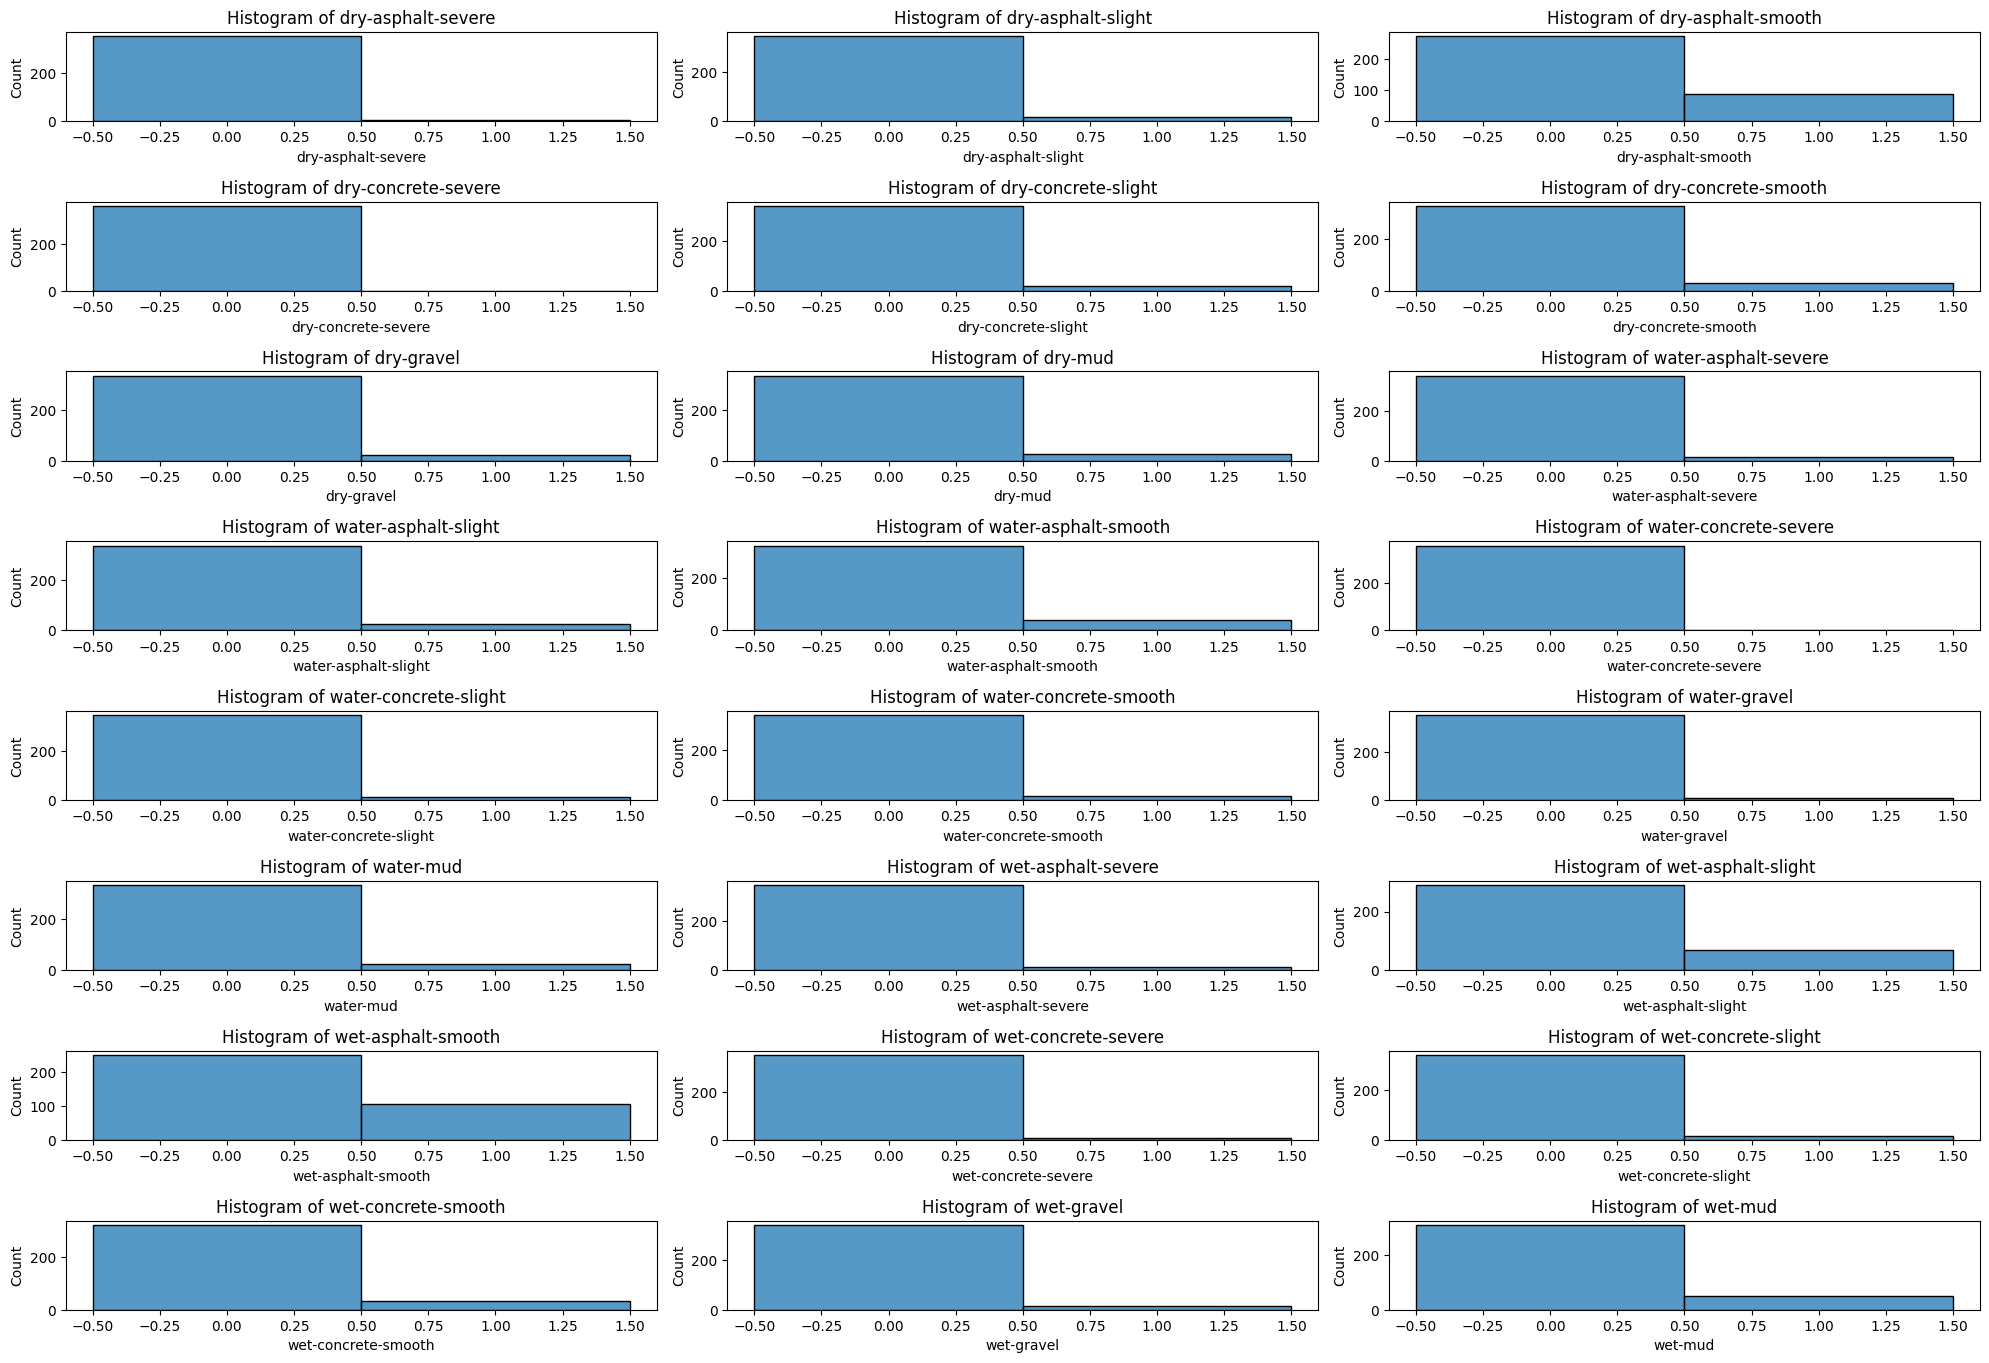

In [6]:
plot_histogram(df=df_one_hotencoding)

### 2.2 Analyzing `df_test_number.csv` File content

This code section handles the loading and analysis of a dataset stored in a CSV file. Unlike the previous one-hot encoded data, this dataset includes counts for various conditions. Each column represents the number of occurrences for specific road surface conditions, providing a more detailed insight into the dataset.

🔗 [CSV file](Dataset\Dataset0\df_test_data_number.csv)

In [7]:
# Load the data
df_test_number = pd.read_csv('Dataset/Dataset0/df_test_data_number.csv')

# Print basic statistics
print("Basic Statistics:")
df_test_number.describe()

Basic Statistics:


,dry-asphalt-severe,dry-asphalt-slight,dry-asphalt-smooth,dry-concrete-severe,dry-concrete-slight,dry-concrete-smooth,dry-gravel,dry-mud,water-asphalt-severe,water-asphalt-slight,...,water-gravel,water-mud,wet-asphalt-severe,wet-asphalt-slight,wet-asphalt-smooth,wet-concrete-severe,wet-concrete-slight,wet-concrete-smooth,wet-gravel,wet-mud
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.00000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.061111,0.069444,1.694444,0.005556,0.194444,0.497222,0.419444,0.286111,0.055556,0.122222,...,0.052778,0.216667,0.050000,0.711111,1.50000,0.044444,0.127778,0.483333,0.091667,0.588889
std,0.479832,0.385185,3.176511,0.105409,0.926834,1.814517,1.680350,1.198340,0.293328,0.524131,...,0.316656,0.915816,0.321469,1.781955,2.61983,0.370533,0.637986,1.618056,0.466048,1.656552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,4.000000,8.000000,2.000000,8.000000,8.000000,8.000000,8.000000,3.000000,6.000000,...,3.000000,8.000000,4.000000,8.000000,8.00000,4.000000,5.000000,8.000000,4.000000,8.000000


Number of Features:  24


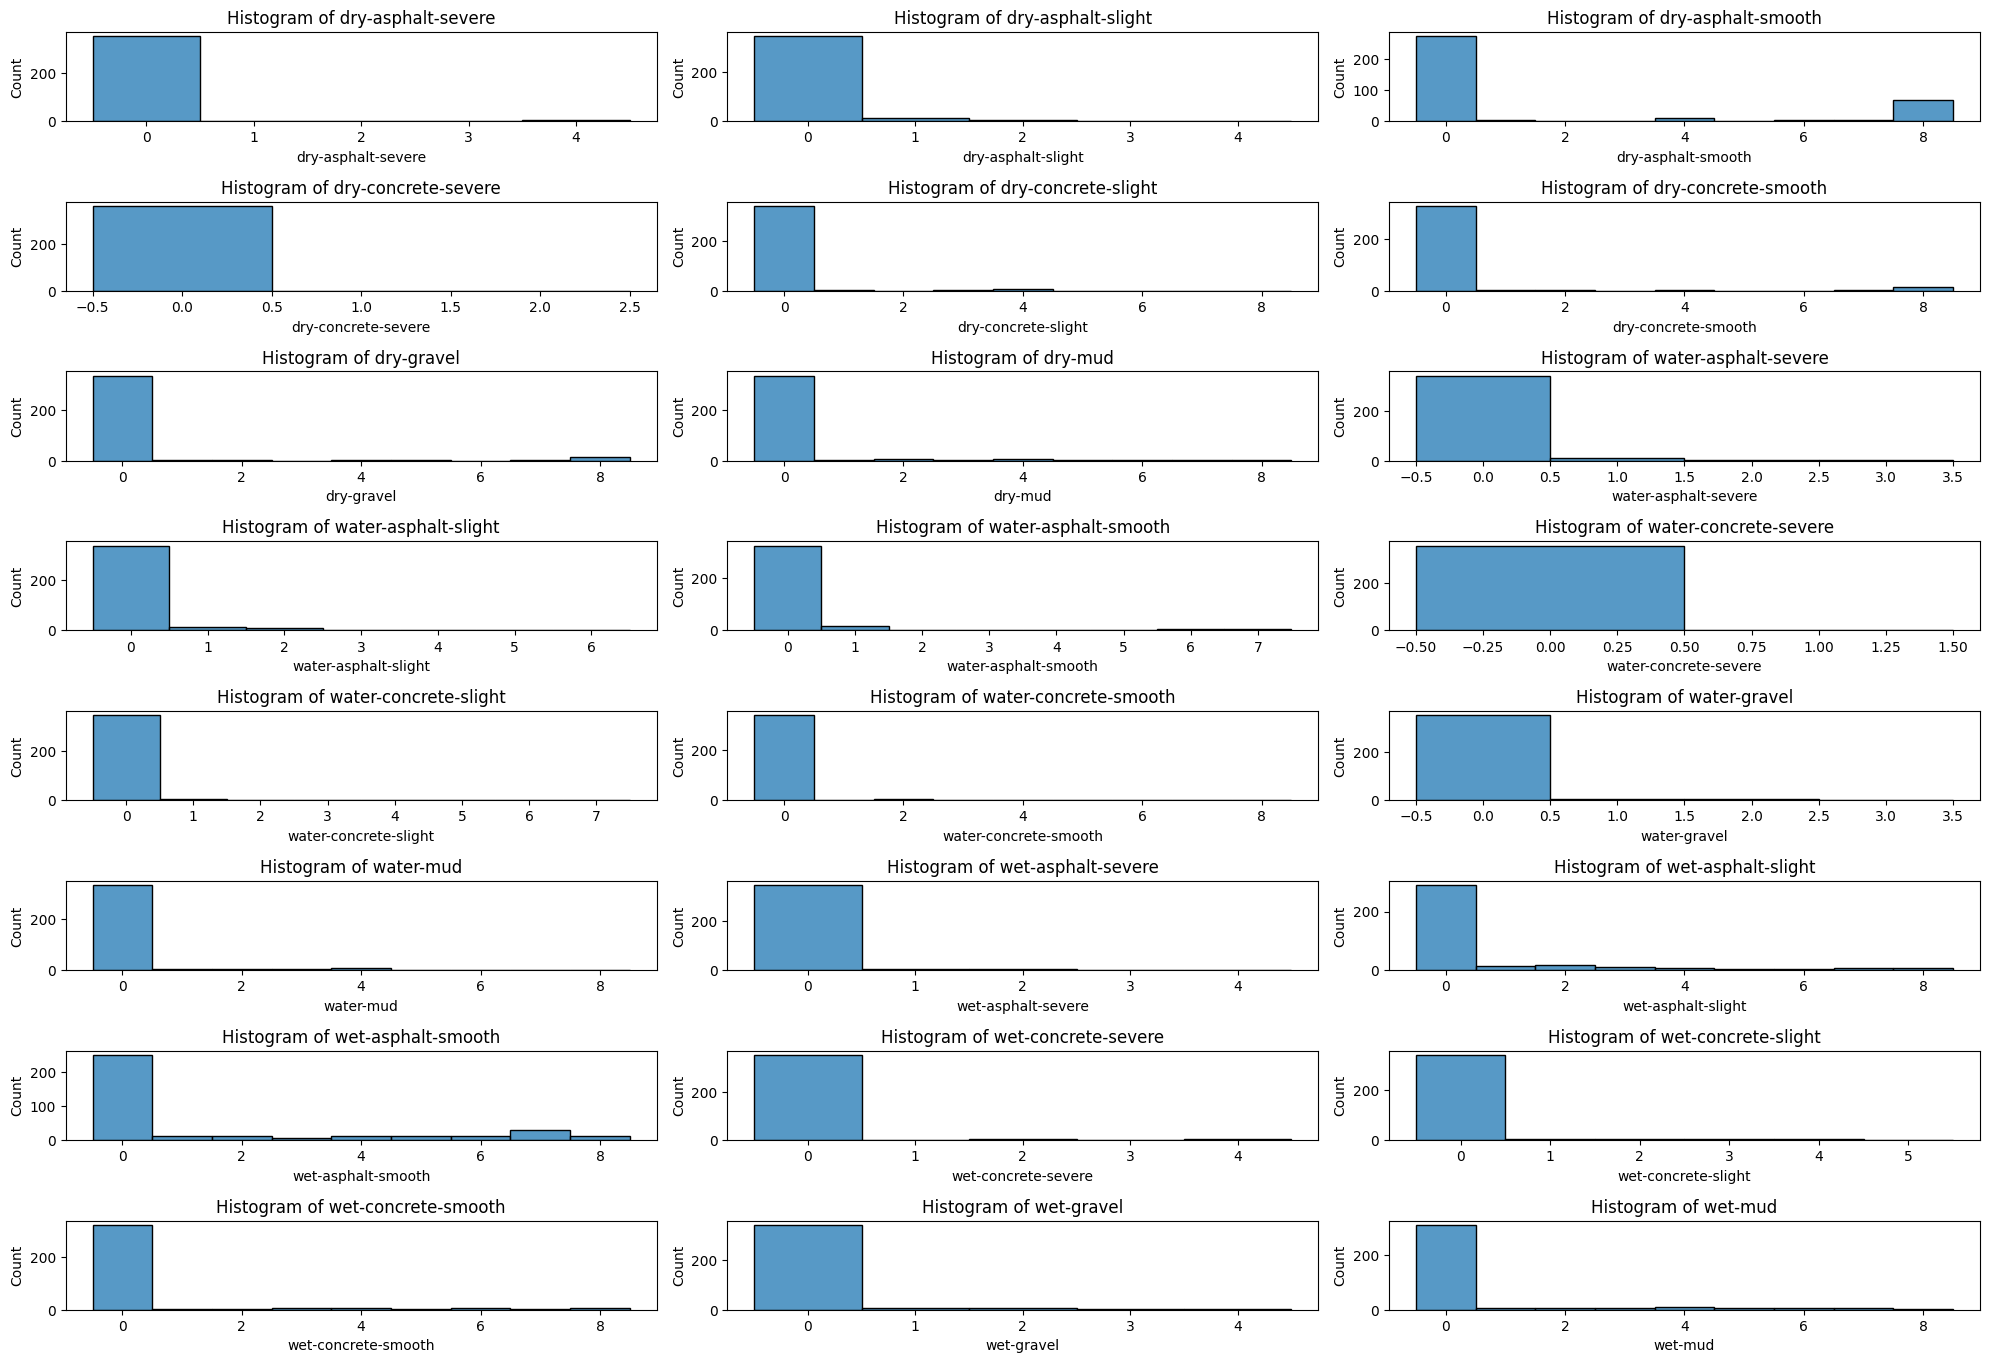

In [8]:
plot_histogram(df=df_test_number)

## 3. Clusturing

### 3.1. Clusturing Count of Each Classes Dataset

-------------------------------------------------------------------------- cosine ------------------------------------------------------------------------------------
-------------------------------------------------------------------------- one hot encoded file ----------------------------------------------------------------------
                                                                          ITERATION = 0                                                                                   
----------------------------------------------------------------------------------------------------------------------------------------------------------------------


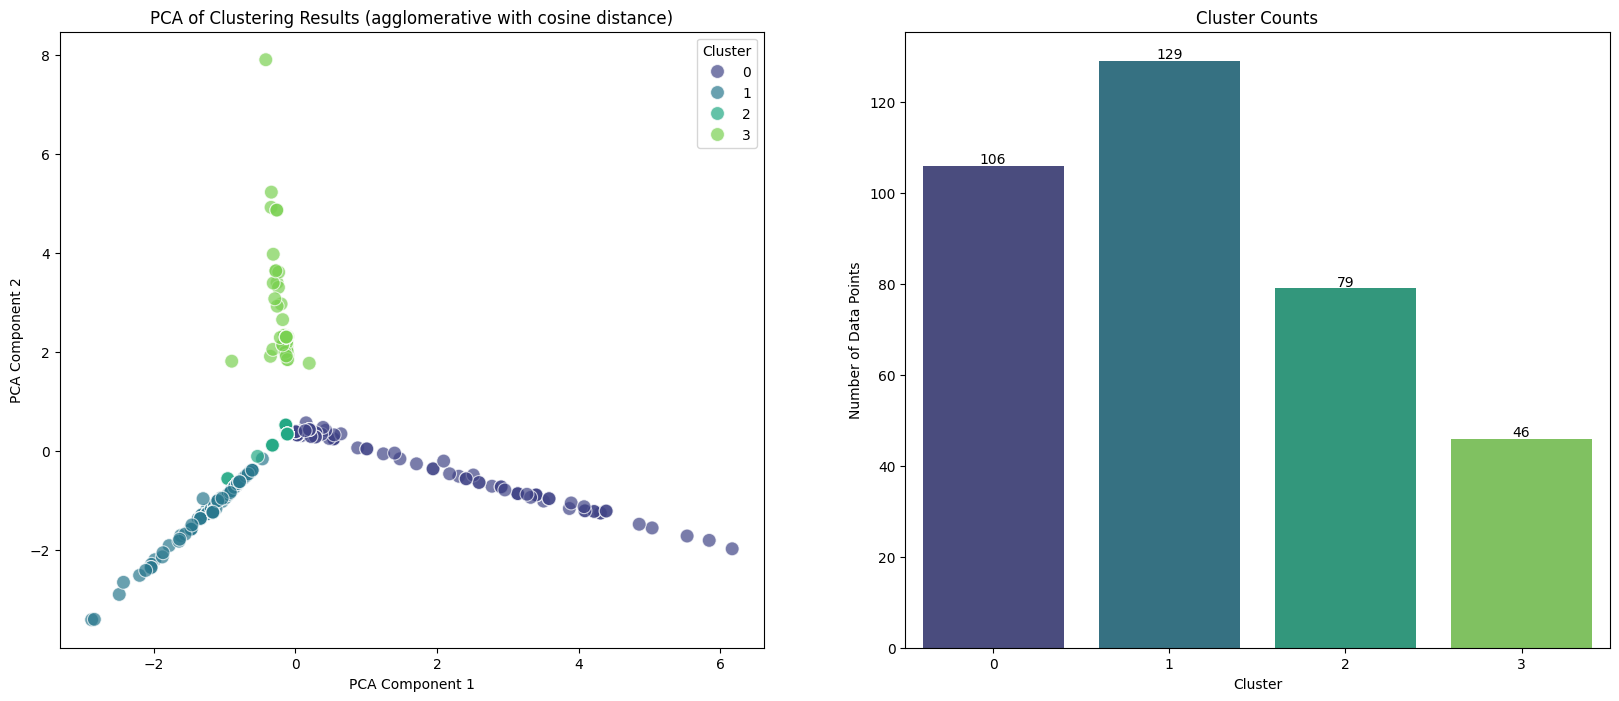

Cluster 0: 70 samples


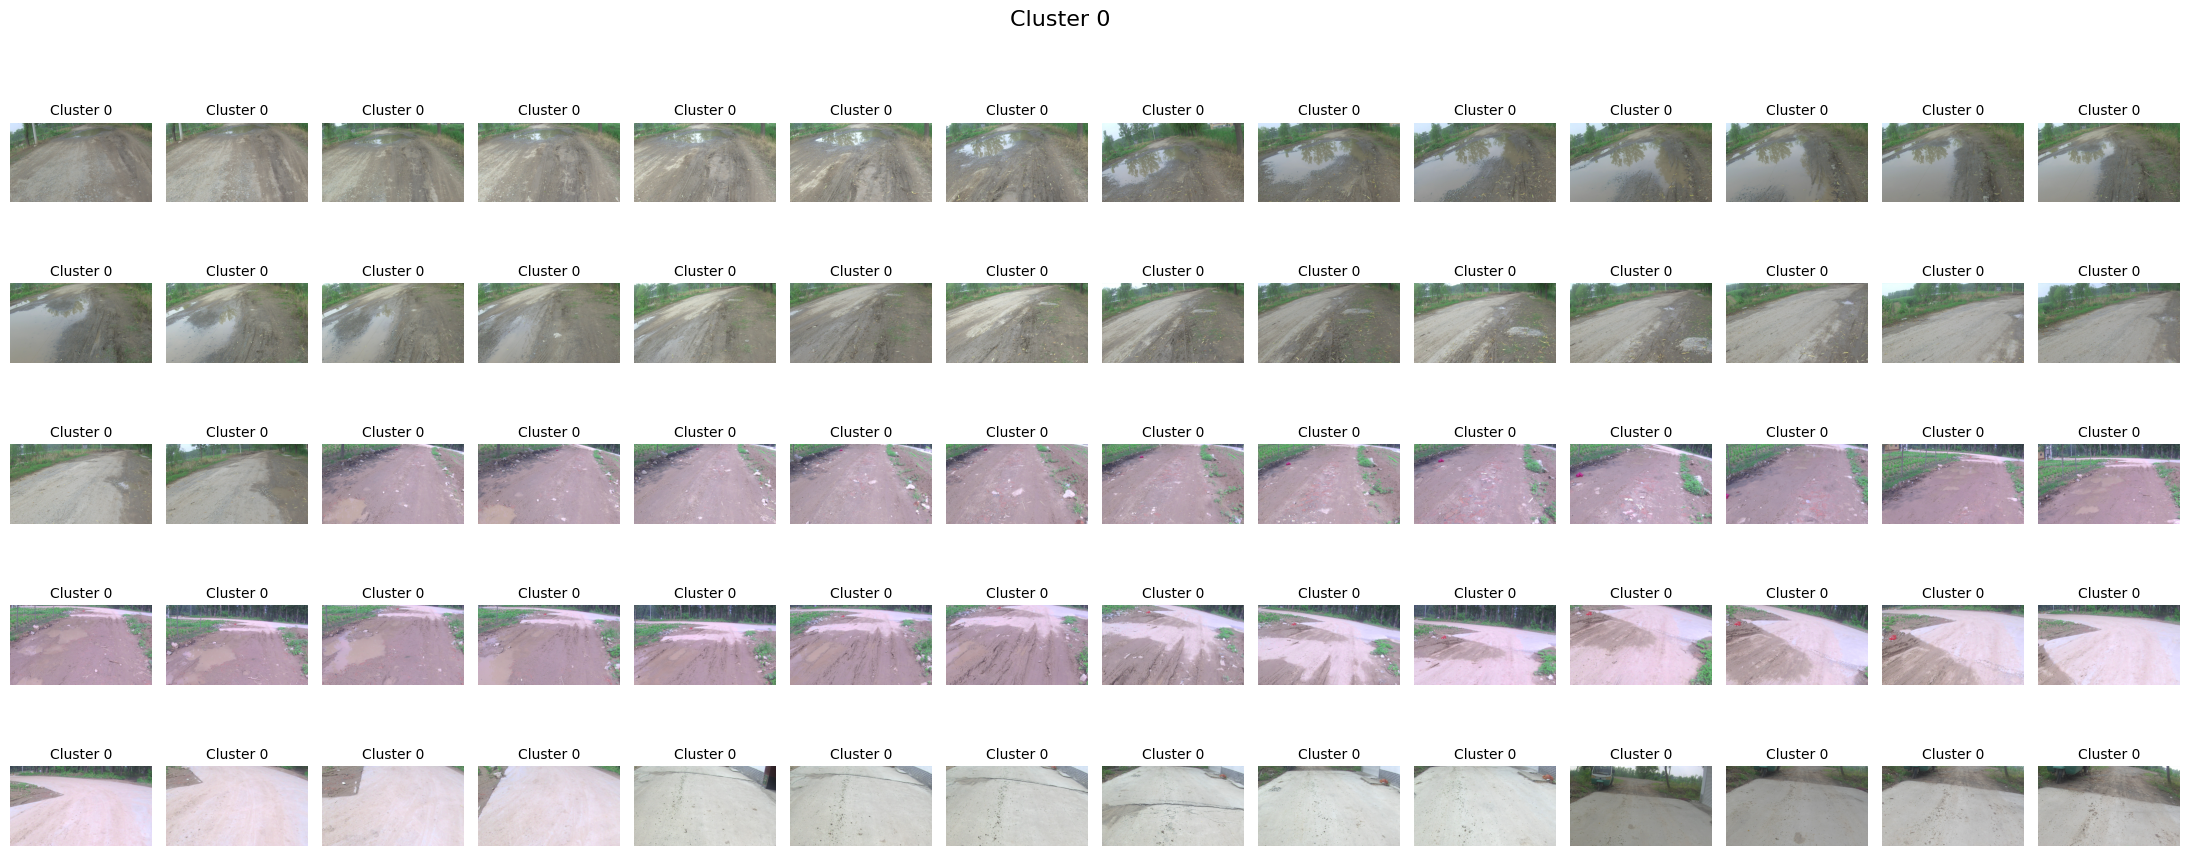

Cluster 1: 70 samples


KeyboardInterrupt: 

In [9]:
image_paths_24 = []
clusters_24 = []

for i in range(3):
    print("-------------------------------------------------------------------------- cosine ------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------- one hot encoded file ----------------------------------------------------------------------")
    print(f'                                                                          ITERATION = {i}                                                                                   ')
    print(f'----------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    img_paths, clstrs, cluster_percentages = clustering_code(df=df_test_number, ppp=24, n_clusters=4, distance_metric='cosine', method='agglomerative')
    image_paths_24.append(img_paths)
    clusters_24.append(clstrs)
    if len(cluster_percentages) == 4 and all(cluster_percentages > 0.10):
        display_sample_images(image_paths=img_paths, clusters=clstrs, n_samples=70, n_rows=5, n_cols=14)
    else:
        pass
    

In [ ]:
image_paths_20 = []
clusters_20 = []

for i in range(3):
    print("-------------------------------------------------------------------------- cosine ------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------- one hot encoded file ----------------------------------------------------------------------")
    print(f'                                                                          ITERATION = {i}                                                                                   ')
    print(f'----------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    img_paths, clstrs, cluster_percentages = clustering_code(df=df_test_number, ppp=20, n_clusters=4, distance_metric='cosine', method='agglomerative')
    image_paths_20.append(img_paths)
    clusters_20.append(clstrs)
    if len(cluster_percentages) == 4 and all(cluster_percentages > 0.10):
        display_sample_images(image_paths=img_paths, clusters=clstrs, n_samples=70, n_rows=5, n_cols=14)
    else:
        pass

In [ ]:
image_paths_16 = []
clusters_16 = []

for i in range(3):
    print("-------------------------------------------------------------------------- cosine ------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------- one hot encoded file ----------------------------------------------------------------------")
    print(f'                                                                          ITERATION = {i}                                                                                   ')
    print(f'----------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    img_paths, clstrs, cluster_percentages = clustering_code(df=df_test_number, ppp=16, n_clusters=4, distance_metric='cosine', method='agglomerative')
    image_paths_18.append(img_paths)
    clusters_18.append(clstrs)
    if len(cluster_percentages) == 4 and all(cluster_percentages > 0.10):
        display_sample_images(image_paths=img_paths, clusters=clstrs, n_samples=70, n_rows=5, n_cols=14)
    else:
        pass

In [ ]:
image_paths_10 = []
clusters_10 = []

for i in range(3):
    print("-------------------------------------------------------------------------- cosine ------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------- one hot encoded file ----------------------------------------------------------------------")
    print(f'                                                                          ITERATION = {i}                                                                                   ')
    print(f'----------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    img_paths, clstrs, cluster_percentages = clustering_code(df=df_test_number, ppp=24, n_clusters=4, distance_metric='cosine', method='agglomerative')
    image_paths_10.append(img_paths)
    clusters_10.append(clstrs)
    if len(cluster_percentages) == 4 and all(cluster_percentages > 0.10):
        display_sample_images(image_paths=img_paths, clusters=clstrs, n_samples=70, n_rows=5, n_cols=14)
    else:
        pass